# Region Proposal Network - Anchors

## 1. Anchors Overview


**Key Concepts**

Anchor generation is to generate a batch of anchors from the base anchor with various of ratios and scales.

For Faster R-CNN, it will generate 9 anchors corresponding to the ratios * scales based on the base anchor [0, 0, 15, 15].

- base_anchor: [0, 0, 15, 15]
- ratios: [r1, r2, r3]
- scales: [s1, s2, s3]

**Steps**

- to set the base_anchor, ratios, and scales;
- to create the anchors from base_anchor by various of ratios;
- to create the anchors from the ratio_anchors by various of scales.

**Inputs**

- base_anchor: [x_centroid, y_centroid, width, height]
- ratios: [0.5, 1, 2]
- scales: [8, 16, 32]

**Outputs**

- anchors: 

```
    [[x1, y1, w1, h1], 
     [x2, y2, w2, h2], 
     [x3, y3, w3, h3]]
```

### 1.1. Anchors: Concepts

1 base_anchor -> m ratio_anchors -> m * n scaled_anchors

```
- base_anchor.shape: [1, k]
- ratios: [1, m]
- scales: [1, n]

- ratio_anchors.shape: [k, 1] * [1, m] = [k, m]
- scaled_anchors.shape: [k, m] * [m, n] = [k, m * n]
```

### 1.2. Anchors: Mathematical Expressions

**Inputs**

- base_anchor: [x_centroid, y_centroid, width, height]
- ratios: [r1, r2, r3]
- scales: [s1, s2, s3]

**Output**

- anchors: 

```
    [[rsx1, rsy1, rsw1, rsh1],
     [rsx2, rsy2, rsw2, rsh2],
     [rsx3, rsy3, rsw3, rsh3],
     [rsx4, rsy4, rsw4, rsh4],
     [rsx5, rsy5, rsw5, rsh5],
     [rsx6, rsy6, rsw6, rsh6],
     [rsx7, rsy7, rsw7, rsh7],
     [rsx8, rsy8, rsw8, rsh8],
     [rsx9, rsy9, rsw9, rsh9]]
```

**Steps**

```
1. ratio_anchors

1.1. x_centroid, y_centroid, width, height

      width' = width - x_centroid + 1
      height' = height - y_centroid + 1
      x_centroid' = x_centroid + 0.5 * (width' - 1)
      y_centroid' = y_centroid + 0.5 * (height' - 1)


1.2. widths, heights

      ratios = [r1, r2, r3]
      
      widths = [round(sqrt(w * h / r1)), round(sqrt(w * h / r2)), round(sqrt(w * h / r3))] = [w1, w2, w3]
      heights = [round (w1 * r1), round(w2 * r2), round(w3 * r3)]


1.3. ratio_anchors

      widths.T = [w1,
                  w2,
                  w3]
      
      heights.T = [h1,
                   h2,
                   h3]
                   
      anchors = [[x - 0.5 * (w1 - 1), y - 0.5 * (h1 - 1), x + 0.5 * (w1 - 1), y + 0.5 * (h1 - 1)],
                 [x - 0.5 * (w2 - 1), y - 0.5 * (h2 - 1), x + 0.5 * (w2 - 1), y + 0.5 * (h2 - 1)],
                 [x - 0.5 * (w3 - 1), y - 0.5 * (h3 - 1), x + 0.5 * (w3 - 1), y + 0.5 * (h3 - 1)]]


2. scaled_anchors

2.1. x_centroid, y_centroid, width, height

      width' = width - x_centroid + 1
      height' = height - y_centroid + 1
      x_centroid' = x_centroid + 0.5 * (width' - 1)
      y_centroid' = y_centroid + 0.5 * (height' - 1)
      
      anchors = [[x1', y1', w1', h1'],
                 [x2', y2', w2', h2'],
                 [x3', y3', w3', h3']]

2.2. widths, heights

      scales = [s1, s2, s3]
      widths = [w1, w2, w3]
      heights = [h1, h2, h3]
      
      widths = [[w1 * s1, w2 * s1, w3 * s1],
                [w1 * s2, w2 * s2, w3 * s2],
                [w1 * s3, w2 * s3, w3 * s3]]
             
             = [[w1s1, w2s1, w3s1],
                [w1s2, w2s2, w3s2],
                [w1s3, w2s3, w3s3]]

      heights = [[h1 * s1, h2 * s1, h3 * s1],
                 [h1 * s2, h2 * s2, h3 * s2],
                 [h1 * s3, h2 * s3, h3 * s3]]
             
              = [[h1s1, h2s1, h3s1],
                 [h1s2, h2s2, h3s2],
                 [h1s3, h2s3, h3s3]]

2.3. scaled_anchors

      scaled_ratio_anchors = [[x1', y1', w1s1, h1s1],
                              [x1', y1', w2s1, h2s1],
                              [x1', y1', w3s1, h3s1],
                              [x2', y2', w1s2, h1s2],
                              [x2', y2', w2s2, h2s2],
                              [x2', y2', w3s2, h3s2],
                              [x3', y3', w1s3, h1s3],
                              [x3', y3', w2s3, h2s3],
                              [x3', y3', w3s3, h3s3]]
                              
      # [(x - 0.5 * (w - 1)), (y - 0.5 * (h - 1)), (x + 0.5 * (w - 1)), (y + 0.5 * (h - 1))]
      - fx = x - 0.5 * (w - 1)
      - fy = y - 0.5 * (h - 1)
      - fw = x + 0.5 * (w - 1)
      - fh = y + 0.5 * (h - 1)
      final_scaled_ratio_anchors = [[fx1', fy1', fw1s1, fh1s1],
                                    [fx1', fy1', fw2s1, fh2s1],
                                    [fx1', fy1', fw3s1, fh3s1],
                                    [fx2', fy2', fw1s2, fh1s2],
                                    [fx2', fy2', fw2s2, fh2s2],
                                    [fx2', fy2', fw3s2, fh3s2],
                                    [fx3', fy3', fw1s3, fh1s3],
                                    [fx3', fy3', fw2s3, fh2s3],
                                    [fx3', fy3', fw3s3, fh3s3]]

```

### 1.3. Anchors: Example

**Inputs**

- base_anchor: [0, 0, 15, 15]
- ratios: [0.5, 1, 2]
- scales: [8, 16, 32]

**Output**

- anchors

**Steps**

```
1. ratio_anchors

1.1. x_centroid, y_centroid, width, height 

      base_anchor: [0, 0, 15, 15]
      - x_centroid: 0
      - y_centroid: 0
      - width: 15
      - height: 15

      width' = 15 - 0 + 1 = 16
      height' = 15 - 0 + 1 = 16
      x_centroid' = 0 + 0.5 * (16 - 1) = 7.5
      y_centroid' = 0 + 0.5 * (16 - 1) = 7.5


1.2. widths, heights

      ratios = [0.5, 1, 2]
      
      size = 16 * 16 = 256
      size_ratios = 256 / [0.5, 1, 2] = [512, 256, 128]
      
      widths = round(sqrt([512, 256, 128])) = [23, 16, 11]
      heights = [23, 16, 11] * [0.5, 1, 2].T = [12, 16, 22]
      
      ratio_anchors = [[7.5, 7.5, 23, 12],
                       [7.5, 7.5, 16, 16],
                       [7.5, 7.5, 11, 22]]
                                               

1.3. ratio_anchors

    widths.T = [23, 16, 11].T
    heights = [11, 16, 22].T

    anchors = [(7.5 - 0.5 * (23 - 1)), (7.5 - 0.5 * (12 - 1)), (7.5 + 0.5 * (23 - 1)), (7.5 + 0.5 * (12 - 1))],
               (7.5 - 0.5 * (16 - 1)), (7.5 - 0.5 * (16 - 1)), (7.5 + 0.5 * (16 - 1)), (7.5 + 0.5 * (16 - 1))],
               (7.5 - 0.5 * (11 - 1)), (7.5 - 0.5 * (22 - 1)), (7.5 + 0.5 * (11 - 1)), (7.5 + 0.5 * (22 - 1))]]
               
            = [[-3.5,    2, 18.5,   13],
               [   0,    0,   15,   15],
               [ 2.5,   -3, 12.5,   18]]


2. scaled_anchors

2.1. x_centroid, y_centroid, width, height

      anchor1 = [-3.5, 2, 18.5, 13]
      - width' = 18.5 - (-3.5) + 1 = 23
      - height' = 13 - 2 + 1 = 12
      - x_centroid' = -3.5 + 0.5 * (23 - 1) = 7.5
      - y_centroid' = 2 + 0.5 * (12 - 1) = 7.5
      
      anchor2 = [0, 0, 15, 15]
      - width' = 15 - 0 + 1 = 16
      - height' = 15 - 0 + 1 = 16
      - x_centroid' = 0 + 0.5 * (16 - 1) = 7.5
      - y_centroid' = 0 + 0.5 * (16 - 1) = 7.5
      
      anchor3 = [2.5, -3, 12.5, 18]
      - width' = 12.5 - 2.5 + 1 = 11
      - height' = 18 - (-3) + 1 = 22
      - x_centroid' = 2.5 + 0.5 * (11 - 1) = 7.5
      - y_centroid' = -3 + 0.5 * (22 - 1) = 7.5
      
      anchors = [[7.5, 7.5, 23, 12],
                 [7.5, 7.5, 16, 16],
                 [7.5, 7.5, 11, 22]]

2.2. widths, heights

      scales = [8, 16, 32]
      widths = [23, 16, 11]
      heights = [12, 16, 22]
      
      scale1 = 8
      - widths' = [23 * 8, 16 * 8, 11 * 8] = [184, 128, 88]
      - heights' = [12 * 8, 16 * 8, 22 * 8] = [96, 128, 176]
      
      scale2 = 16
      - widths' = [23 * 16, 16 * 16, 11 * 16 = [368, 256, 176]
      - heights' = [12 * 16, 16 * 16, 22 * 16] = [192, 256, 352]
      
      scale3 = 32
      - widths' = [23 * 32, 16 * 32, 11 * 32] = [736, 512, 352]
      - heights' = [12 * 32, 16 * 32, 22 * 32] = [384, 512, 704]
      
      widths = [[184, 128,  88],
                [368, 256, 176],
                [736, 512, 352]]
                
      heights = [[ 96, 128, 176],
                 [192, 256, 352],
                 [384, 512, 704]]
      
      
     
2.3. scaled_anchors
                        
 ratio_anchors = [[7.5, 7.5, 184,  96],
                  [7.5, 7.5, 128, 128],
                  [7.5, 7.5,  88, 176],
                  [7.5, 7.5, 368, 192],
                  [7.5, 7.5, 256, 256],
                  [7.5, 7.5, 176, 352],
                  [7.5, 7.5, 736, 384],
                  [7.5, 7.5, 512, 512],
                  [7.5, 7.5, 352, 704]]
                        
                                             
  # [(x - 0.5 * (w - 1)), (y - 0.5 * (h - 1)), (x + 0.5 * (w - 1)), (y + 0.5 * (h - 1))]
        
  scaled_anchors = [[ 7.5 - 0.5 * (184 - 1), 7.5 - 0.5 * ( 96 - 1), 7.5 + 0.5 * (184 - 1), 7.5 + 0.5 * ( 96 - 1)],
                    [ 7.5 - 0.5 * (128 - 1), 7.5 - 0.5 * (128 - 1), 7.5 + 0.5 * (128 - 1), 7.5 + 0.5 * (128 - 1)],
                    [ 7.5 - 0.5 * ( 88 - 1), 7.5 - 0.5 * (176 - 1), 7.5 + 0.5 * ( 88 - 1), 7.5 + 0.5 * (176 - 1)],
                    [ 7.5 - 0.5 * (368 - 1), 7.5 - 0.5 * (192 - 1), 7.5 + 0.5 * (368 - 1), 7.5 + 0.5 * (192 - 1)],
                    [ 7.5 - 0.5 * (256 - 1), 7.5 - 0.5 * (256 - 1), 7.5 + 0.5 * (256 - 1), 7.5 + 0.5 * (256 - 1)],
                    [ 7.5 - 0.5 * (176 - 1), 7.5 - 0.5 * (352 - 1), 7.5 + 0.5 * (176 - 1), 7.5 + 0.5 * (352 - 1)],
                    [ 7.5 - 0.5 * (736 - 1), 7.5 - 0.5 * (384 - 1), 7.5 + 0.5 * (736 - 1), 7.5 + 0.5 * (384 - 1)],
                    [ 7.5 - 0.5 * (512 - 1), 7.5 - 0.5 * (512 - 1), 7.5 + 0.5 * (512 - 1), 7.5 + 0.5 * (512 - 1)],
                    [ 7.5 - 0.5 * (352 - 1), 7.5 - 0.5 * (704 - 1), 7.5 + 0.5 * (352 - 1), 7.5 + 0.5 * (704 - 1)]]
                          
                  = [[ -84,  -40,  99,  55],
                     [ -56,  -56,  71,  71],
                     [ -36,  -80,  51,  95],
                     [-176,  -88, 191, 103],
                     [-120, -120, 135, 135],
                     [ -80, -168,  95, 183],
                     [-360, -184, 375, 199],
                     [-248, -248, 263, 263],
                     [-168, -344, 183, 359]]
                       

```

### 1.4. Anchors: Visualization

In [299]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def draw_anchors(anchors):
    """
    Drawing the anchors by anchor data.
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # add anchors
    ax.add_patch(matplotlib.patches.Rectangle((0, 0), 15, 15, fill=False, edgecolor='red'))
    for anchor in anchors:
        ax.add_patch(matplotlib.patches.Rectangle((anchor[0], anchor[1]),    # x_centroid, y_centroid
                                                  anchor[2],                 # width
                                                  anchor[3],                 # height
                                                  fill=False,
                                                  edgecolor='blue'))

    plt.xlim([-500, 500])
    plt.ylim([-500, 500])
    plt.show()

#### 1.4.1. base anchor

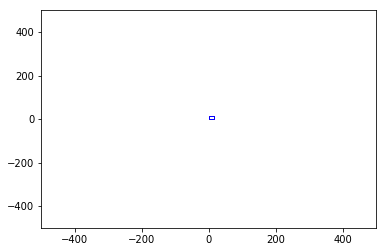

In [300]:
# 1. base_anchor

base_anchor = [[0, 0, 15, 15]]
draw_anchors(base_anchor)

#### 1.4.2. ratio_anchors

##### 1.4.2.1. ratio_anchors: x, y, w, h

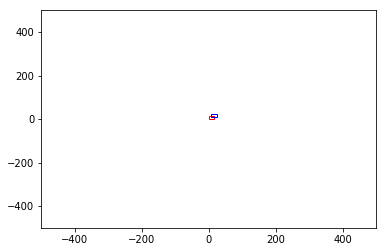

In [306]:
# 2. ratio_anchors

# 2.1 x, y, w, h

ratio_anchor = [[7.5, 7.5, 16, 16]]
draw_anchors(ratio_anchor)

##### 1.4.2.2. ratio_anchors: w, h with ratios

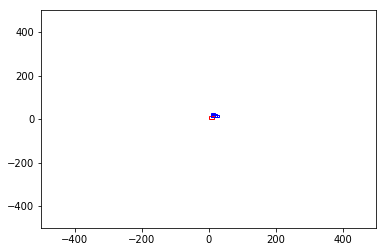

In [307]:
# 2.2. w, h

ratio_anchors_with_wh = [[7.5, 7.5, 23, 12],
                         [7.5, 7.5, 16, 16],
                         [7.5, 7.5, 11, 22]]
draw_anchors(ratio_anchors_with_wh)

##### 1.4.2.3. ratio_anchors: interim ratio anchors

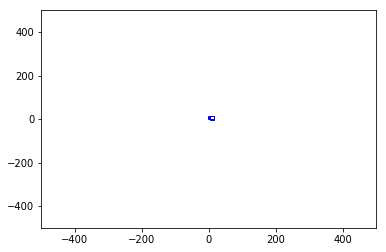

In [301]:
# 2.3 ratio_anchors

ratio_anchors = [[-3.5,    2, 18.5,   13],
                 [   0,    0,   15,   15],
                 [ 2.5,   -3, 12.5,   18]]
draw_anchors(ratio_anchors)

#### 1.4.3. scale anchors

##### 1.4.3.1. scale_anchors: x, y, w, h

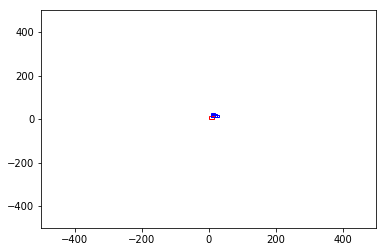

In [302]:
# 3. scaled_anchors

# 3.1. x, y, w, h
new_ratio_anchors = [[7.5, 7.5, 23, 12],
                     [7.5, 7.5, 16, 16],
                     [7.5, 7.5, 11, 22]]
draw_anchors(new_ratio_anchors)

##### 1.4.3.2. scaled_anchors: widths, heights by scales

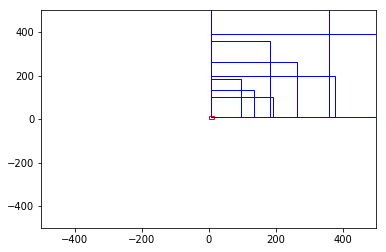

In [304]:
# 3.2. widths, heights

scaled_ratio_anchors = [[7.5, 7.5, 184,  96],
                        [7.5, 7.5, 128, 128],
                        [7.5, 7.5,  88, 176],
                        [7.5, 7.5, 368, 192],
                        [7.5, 7.5, 256, 256],
                        [7.5, 7.5, 176, 352],
                        [7.5, 7.5, 736, 384],
                        [7.5, 7.5, 512, 512],
                        [7.5, 7.5, 352, 704]]
draw_anchors(scaled_ratio_anchors)

##### 1.4.3.3. scaled_anchors: final_scaled_anchors

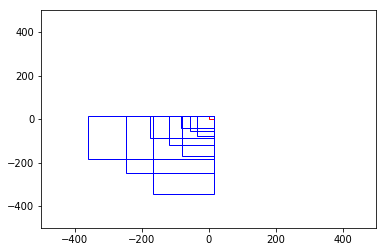

In [305]:
# 3.3. final anchors

final_scaled_anchors = [[ -84,  -40,  99,  55],
                        [ -56,  -56,  71,  71],
                        [ -36,  -80,  51,  95],
                        [-176,  -88, 191, 103],
                        [-120, -120, 135, 135],
                        [ -80, -168,  95, 183],
                        [-360, -184, 375, 199],
                        [-248, -248, 263, 263],
                        [-168, -344, 183, 359]]
draw_anchors(final_scaled_anchors)

## 2. Anchors Implementation

Function Tree:

```
    generate_anchors(base_size, ratios, scales)
              +
              +------ _generate_multi_ratio_anchors(anchor, ratios)
              +                +
              +                +------ _get_anchor_info(anchor)
              +                +------ widths, heights by ratios
              +                +------ _create_anchors(widths, heightss, x_centroid, y_centroid)
              +
              +------ _generate_multi_scaled_anchors(anchor, scales)
                               +
                               +------ _get_anchor_info(anchor)
                               +------ widths, heights by scales
                               +------ _create_anchors(widths, heights, x_centroid, y_centroid)
```

### 2.1. Anchors Implementation: generate_anchors(base_size, ratios, scales)

#### 2.1.1. Mathematical Expressions

**Inputs**

- base_size:
- ratios:
- scales:

**Outputs**

- anchors:

**Expressions**

- base_anchor = [0, 0, base_size, base_size] - 1
- ratio_anchors:
- scaled_anchors:

#### 2.1.2. Source Codes

In [288]:
def generate_anchors(base_size=16, 
                     ratios=[0.5, 1, 2],
                     scales=2**np.arange(3, 6)):
    """
    Input base_size, ratios [r1, r2, ..., rn] and scales [s1, s2, ..., sn]
    and returns the anchors by ratios * scales one by one.
    
    Algorithms:
    - inputs:
      - base_size:
      - ratios:
      - scales:
    - output:
      - anchors:
    - process:
      - to get the base_anchor: [1, 1, base_size, base_size] - 1
      - to generate ratio_anchors
      - to generate anchors from ratio_anchors by scales
      
    For instance:
    
        base_anchor: [0, 0, 15, 15], with shape (4, 1)
        ratios: [0.5, 1, 2], with shape (1, 3)
        scales: [8, 16, 32], with shape (1, 3)
        
        ratio_anchors:
          - shape = base_anchor.shape * ratios.shape = (4, 1) * (1, 3) = (4, 3)
          - format:
                [[rx1, ry1, rw1, rh1],
                 [rx2, ry2, rw2, rh2], 
                 [rx3, ry3, rw3, rh3]]

        scaled_anchors:
          - shape = ratio_anchors.shape * scales.shape = (4, 3) * 3 = (4, 9)
          - format:
                [[rsx1, rsy1, rsw1, rsh1],
                 [rsx2, rsy2, rsw2, rsh2],
                 [rsx3, rsy3, rsw3, rsh3],
                 [rsx4, rsy4, rsw4, rsh4],
                 [rsx5, rsy5, rsw5, rsh5],
                 [rsx6, rsy6, rsw6, rsh6],
                 [rsx7, rsy7, rsw7, rsh7],
                 [rsx8, rsy8, rsw8, rsh8],
                 [rsx9, rsy9, rsw9, rsh9]]

    Inputs:
    @param base_size: a value
    @param ratios: a vector [r1, r2, ..., rn]
    @param scales: a vector [s1, s2, ..., sn]
    
    Outputs:
    @output anchors: with shape (anchor.shape, ratios.shape * scales.shape)
    """

    base_anchor = np.array([1, 1, base_size, base_size]) - 1

    ratio_anchors = _generate_multi_ratio_anchors(base_anchor, ratios)
    
    # generate anchors by ratio_anchors * scales
    anchors = np.vstack([_generate_multi_scaled_anchors(ratio_anchors[i, :], scales) 
                         for i in xrange(ratio_anchors.shape[0])])
    
    return anchors

#### 2.1.3. Test Cases

In [160]:
generate_anchors()

anchor[x_centroid, y_centroid, width, height]:  [ 0  0 15 15]
width' = width - x_centroid + 1 =  16
height' = height - y_centroid + 1 =  16
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]
ratio_anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]
anchor[x_centroid, y_centroid, width, height]:  [ -3.5   2.   18.5  13. ]
width' = width - x_centroid + 1 =  23.0
height' = height - y_centroid + 1 =  12.0
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
anchors:  [[ -84.  -40.   99.   55.]
 [-176.  -88.  191.  103.]
 [-360. -184.  375.  199.]]
scaled_anchors:  [[ -84.  -40.   99.   55.]
 [-176.  -88.  191.  103.]
 [-360. -184.  375.  199.]]
anchor[x_centroid, y_centroid, width, height]:  [  0.   0.  15.  15.]
width' = width - x_centroid + 1 =  16.0

array([[ -84.,  -40.,   99.,   55.],
       [-176.,  -88.,  191.,  103.],
       [-360., -184.,  375.,  199.],
       [ -56.,  -56.,   71.,   71.],
       [-120., -120.,  135.,  135.],
       [-248., -248.,  263.,  263.],
       [ -36.,  -80.,   51.,   95.],
       [ -80., -168.,   95.,  183.],
       [-168., -344.,  183.,  359.]])

### 2.2. Anchors Implementation:  _generate_multi_ratio_anchors(anchor, ratios)

#### 2.2.1. Mathematical Expressions

**Inputs**

- anchor: [x_centroid, y_centorid, width, height]
- ratios: [r1, r2, r3]

**Outputs**

- ratio_anchors: a matrix

```
    [[rx1, ry1, rw1, rh1],
     [rx2, ry2, rw2, rh2],
     [rx3, ry3, rw3, rh3]]
```

**Expressions**

- anchor -> width, height, x_centroid, y_centroid
- widths = np.round(np.sqrt(width*height/ratios))
- heights = np.round(widths * ratios)
- widths, heights, x_centroid, y_centroid -> anchors

#### 2.2.2. Source Codes

In [291]:
def _generate_multi_ratio_anchors(anchor, ratios):
    """
    Input an anchor[x_centroid, y_centroid, width, height] and a vector ratios [r1, r2, r3]
    and returns the batch of ratio anchors.
    
    Algorithms:
    - inputs:
      - anchor: [x_centroid, y_centroid, width, height]
      - ratios: [r1, r2, r3]
    - outputs:
      - ratio_anchors: 
    - process:
      - get the anchor info: width, height, x_centroid, y_centroid
      - calculate the widths and heights by ratios
      - generate the anchors by ratios
    
    Inputs:
    @param anchor: (type) numpy.array(), a vector of [x_centroid, y_centroid, width, height]
    @param ratios: (type) numpy.array(), a vector of ratios [r1, r2, r3]
    
    Outputs:
    @output ratio_anchors: (type) numpy.array()
    
        array([[ -3.5,  2, 18.5, 13 ],
               [    0,  0,   15, 15 ],
               [  2.5, -3, 12.5, 18]])
    """


    width, height, x_centroid, y_centroid = _get_anchor_info(anchor)

    size = width * height
    size_ratios = size / ratios
    widths = np.round(np.sqrt(size_ratios))
    heights = np.round(widths * ratios)
    
    print "widths: ", widths
    print "ratios: ", ratios
    print "heights: ", heights
    
    anchors = _create_anchors(widths, heights, x_centroid, y_centroid)

    print "ratio_anchors: ", anchors

    return anchors

#### 2.2.3. Test Cases

In [292]:
anchor = np.array([0, 0, 15, 15])
ratios = np.array([0.5, 1, 2])

_generate_multi_ratio_anchors(anchor, ratios)

anchor[x_centroid, y_centroid, width, height]:  [ 0  0 15 15]
width' = width - x_centroid + 1 =  16
height' = height - y_centroid + 1 =  16
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
widths:  [ 23.  16.  11.]
ratios:  [ 0.5  1.   2. ]
heights:  [ 12.  16.  22.]
anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]
ratio_anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]


array([[ -3.5,   2. ,  18.5,  13. ],
       [  0. ,   0. ,  15. ,  15. ],
       [  2.5,  -3. ,  12.5,  18. ]])

### 2.3. Anchors Implementation:  _generate_multi_scaled_anchors(anchor, scales)

#### 2.3.1. Mathematical Expressions

**Inputs**

- anchor: [x_centroid, y_centroid, width, height]
- scales: [s1, s2, s3]

**Outputs**

- scaled_anchors: a matrix

```
        array([[ -56.,  -56.,   71.,   71.],
               [-120., -120.,  135.,  135.],
               [-248., -248.,  263.,  263.]])
```

**Expressions**

- anchor -> width, height, x_centroid, y_centroid
- widths = width * scales
- heights = height * scales
- widths, heights, x_centroid, y_centroid -> scaled_anchors 

#### 2.3.2. Source Codes

In [297]:
def _generate_multi_scaled_anchors(anchor, scales):
    """
    Input an anchor [x_centroid, y_centroid, width, height] and scales [s1, s2, s3]
    and returns the batch of scaled anchors.
    
    Algorithms:
    - inputs:
      - anchor: [x_centroid, y_centroid, width, height]
      - scales: [s1, s2, s3, ...]
    - output: scaled_anchors
    - process:
      - get width, height, x_centroid, y_centroid
      - widths = width * scales
      - heights = height * scales
      - widths, heights, x_centroid, y_centroid -> scaled_anchors
    
    Inputs:
    @param anchor: (type) numpy.array(), a vector [x_centroid, y_centroid, width, height]
    @param scales: (type) numpy.array(), a vector [s1, s2, s3]
     
    Outputs:
    @param scaled_anchors:
    
        array([[ -56.,  -56.,   71.,   71.],
               [-120., -120.,  135.,  135.],
               [-248., -248.,  263.,  263.]])
    """

    width, height, x_centroid, y_centroid = _get_anchor_info(anchor)
    
    widths = width * scales
    heights = height * scales
    
    print "width: ", width
    print "height: ", height
    print "scales: ", scales
    print "widths: ", widths
    print "heights: ", heights
    print "x_centroid: ", x_centroid
    print "y_centroid: ", y_centroid
    
    anchors = _create_anchors(widths, heights, x_centroid, y_centroid)
    
    print "scaled_anchors: ", anchors

    return anchors

#### 2.3.3. Test Cases

In [298]:
# test single anchor

anchor = np.array([2.5, -3, 12.5, 18])
scales = np.array([8, 16, 32])

_generate_multi_scaled_anchors(anchor, scales)

anchor[x_centroid, y_centroid, width, height]:  [  2.5  -3.   12.5  18. ]
width' = width - x_centroid + 1 =  11.0
height' = height - y_centroid + 1 =  22.0
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
width:  11.0
height:  22.0
scales:  [ 8 16 32]
widths:  [  88.  176.  352.]
heights:  [ 176.  352.  704.]
x_centroid:  7.5
y_centroid:  7.5
anchors:  [[ -36.  -80.   51.   95.]
 [ -80. -168.   95.  183.]
 [-168. -344.  183.  359.]]
scaled_anchors:  [[ -36.  -80.   51.   95.]
 [ -80. -168.   95.  183.]
 [-168. -344.  183.  359.]]


array([[ -36.,  -80.,   51.,   95.],
       [ -80., -168.,   95.,  183.],
       [-168., -344.,  183.,  359.]])

### 2.4. Anchors Implementation: _get_anchor_info(anchor)

#### 2.4.1. Mathematical Expressions

**Inputs**

anchor[x_centroid, y_centroid, width, height]

**Outputs**

- width'
- height'
- x_centroid'
- y_centroid'

**Expressions**

- width' = width - x_centroid + 1
- height' = height - y_centroid + 1
- x_centroid' = x_centroid + 0.5 * (width' - 1)
- y_centroid' = y_centroid + 0.5 * (height' - 1)

#### 2.4.2. Source Codes

In [94]:
def _get_anchor_info(anchor):
    """
    Returns the anchor info (width, height, x_centroid, y_centroid) 
    by an anchor [x_centroid, y_centroid, width, height].
    
    Algorithms:
    - input: anchor[x_centroid, y_centorid, width, height]
    - outputs: width', height', x_centroid', y_centroid'
    - process:
      - width' = width - x_centroid + 1
      - height' = height - y_centroid + 1
      - x_centroid' = x_centroid + 0.5 * (width' - 1)
      - y_centroid' = y_centroid + 0.5 * (height' - 1)

    
    Inputs:
    @param anchor: [x_centroid, y_centroid, width, height]
    
    Outputs:
    @output anchor: width, height, x_centroid, y_centroid
    """

    width = anchor[2] - anchor[0] + 1
    height = anchor[3] - anchor[1] + 1
    x_centroid = anchor[0] + 0.5 * (width - 1)
    y_centroid = anchor[1] + 0.5 * (height - 1)

    print "anchor[x_centroid, y_centroid, width, height]: ", anchor
    print "width' = width - x_centroid + 1 = ", width
    print "height' = height - y_centroid + 1 = ", height
    print "x_centroid' = x_centroid + 0.5 * (width' - 1) = ", x_centroid
    print "y_centroid' = y_centroid + 0.5 * (height' - 1) = ", y_centroid

    return width, height, x_centroid, y_centroid

#### 2.4.3. Test Cases

In [99]:
anchor = [0, 0, 15, 15]

_get_anchor_info(anchor)

anchor[x_centroid, y_centroid, width, height]:  [0, 0, 15, 15]
width' = width - x_centroid + 1 =  16
height' = height - y_centroid + 1 =  16
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5


(16, 16, 7.5, 7.5)

### 2.5. Anchors Implementation: _create_anchors(widths, heights, x_centroid, y_centroid)

#### 2.5.1. Mathematical Expressions

**Inputs**

- widths:
- heights:
- x_centroid:
- y_centroid:

**Outputs**

- anchors:

**Expressions**

- widths.T and heights.T
- x_centroid - 0.5 * (widths - 1)
- y_centroid - 0.5 * (heights - 1)
- x_centroid + 0.5 * (widths - 1)
- y_centroid + 0.5 * (heights - 1)

#### 2.5.2. Source Codes

In [105]:
def _create_anchors(widths, heights, x_centroid, y_centroid):
    """
    Given a vector of widths[x1, x2, x3] and heights[h1, h2, h3] around
    a center (x_centroid, y_centroid), returns a set of anchors (windows).
    
    Algorithms:
    - inputs:
      - widths: a vector [w1, w2, w3, ...]
      - heights: a vector [h1, h2, h3, ...]
      - x_centroid: a value
      - y_centroid: a value
    - outputs:
      - anchors:
    - process:
      - to transform the widths and heights: row -> col
      - to calculate the anchors
        - x_centroid - 0.5 * (widths - 1)
        - y_centroid - 0.5 * (heights - 1)
        - x_centroid + 0.5 * (widths - 1)
        - y_centroid + 0.5 * (heights - 1)
      - to transform the anchors in sequence horizontally
    
    Inputs:
    @param widths: (type) numpy.array(), a vector [w1, w2, w3, ...]
    @param heights: (type) numpy.array(), a vector [h1, h2, h3, ...]
    @param x_centroid: a value
    @param y_centroid: a value
    
    Outputs:
    @output anchors:
    """

    # transform the widths: row -> col
    widths = widths[:, np.newaxis]
    heights = heights[:, np.newaxis]

    # calculate anchors and stack arrays in sequence horizontally (column wise)
    anchors = np.hstack((x_centroid - 0.5 * (widths - 1),
                         y_centroid - 0.5 * (heights - 1),
                         x_centroid + 0.5 * (widths - 1),
                         y_centroid + 0.5 * (heights - 1)))
    
    print "anchors: ", anchors

    return anchors

#### 2.5.3. Test Cases

In [106]:
widths = np.array([128, 256, 512])
heights = np.array([128, 256, 512])
x_centroid = 7.5
y_centroid = 7.5

_create_anchors(widths, heights, x_centroid, y_centroid)

anchors:  [[ -56.  -56.   71.   71.]
 [-120. -120.  135.  135.]
 [-248. -248.  263.  263.]]


array([[ -56.,  -56.,   71.,   71.],
       [-120., -120.,  135.,  135.],
       [-248., -248.,  263.,  263.]])

## 3. Test Examples

In [242]:
# generate anchors
anchors = generate_anchors()
print "anchors: ", anchors

anchor[x_centroid, y_centroid, width, height]:  [ 0  0 15 15]
width' = width - x_centroid + 1 =  16
height' = height - y_centroid + 1 =  16
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]
ratio_anchors:  [[ -3.5   2.   18.5  13. ]
 [  0.    0.   15.   15. ]
 [  2.5  -3.   12.5  18. ]]
anchor[x_centroid, y_centroid, width, height]:  [ -3.5   2.   18.5  13. ]
width' = width - x_centroid + 1 =  23.0
height' = height - y_centroid + 1 =  12.0
x_centroid' = x_centroid + 0.5 * (width' - 1) =  7.5
y_centroid' = y_centroid + 0.5 * (height' - 1) =  7.5
anchors:  [[ -84.  -40.   99.   55.]
 [-176.  -88.  191.  103.]
 [-360. -184.  375.  199.]]
scaled_anchors:  [[ -84.  -40.   99.   55.]
 [-176.  -88.  191.  103.]
 [-360. -184.  375.  199.]]
anchor[x_centroid, y_centroid, width, height]:  [  0.   0.  15.  15.]
width' = width - x_centroid + 1 =  16.0

In [286]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def draw_anchors(anchors):
    """
    Drawing the anchors by anchor data.
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # add anchors
    ax.add_patch(matplotlib.patches.Rectangle((0, 0), 15, 15, fill=False, edgecolor='red'))
    for anchor in anchors:
        ax.add_patch(matplotlib.patches.Rectangle((anchor[0], anchor[1]),    # x_centroid, y_centroid
                                                  anchor[2],                 # width
                                                  anchor[3],                 # height
                                                  fill=False,
                                                  edgecolor='blue'))

    plt.xlim([-500, 500])
    plt.ylim([-500, 500])
    plt.show()

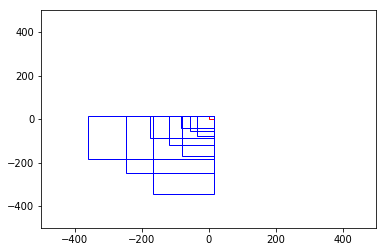

In [287]:
draw_anchors(anchors)